In [61]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

In [62]:
# Load background and person (with transparent background)
background = Image.open("background.jpg").convert("RGBA")
person = Image.open("person.png").convert("RGBA")

In [63]:
# Resize person to fit background (optional scale tweak)
person = person.resize((int(background.width * 0.3), int(background.height * 0.5)))

In [64]:

# Position person (bottom center)
x = (background.width - person.width) // 2
y = background.height - person.height - 30  # Slightly above bottom

In [65]:
# Create soft shadow
shadow = person.copy()
shadow = shadow.convert("L")
shadow = Image.merge("RGBA", [shadow]*3 + [shadow])
shadow = shadow.point(lambda p: p * 80 // 255)  # Adjust shadow opacity
shadow = shadow.filter(ImageFilter.GaussianBlur(15))

In [66]:
# Create composite
composite = background.copy()
composite.paste(shadow, (x + 20, y + 20), shadow)  # Offset shadow
composite.paste(person, (x, y), person)            # Paste person

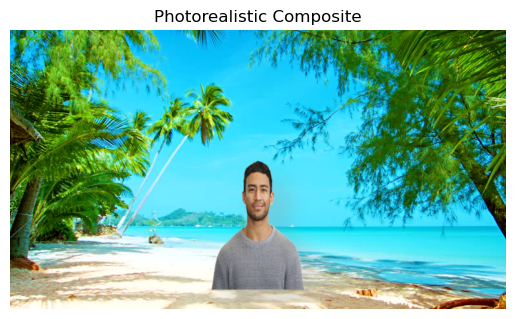

In [67]:

# Save and show result
composite.convert("RGB").save("final_composite.jpg")
composite.show()

plt.imshow(composite)
plt.axis('off')
plt.title("Photorealistic Composite")
plt.show()
